In [7]:
import requests
import pandas as pd
from vega_datasets import data
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
df = pd.read_csv('mfsnowcrab.csv')

In [9]:
df.head()

id  latitude  longitude  year       name   sex  bottom_depth  \
0  147038  57.00000 -166.45000  1975  snow crab  male            71   
1  147037  57.00000 -167.08333  1975  snow crab  male            71   
2  147036  57.00000 -167.68333  1975  snow crab  male            75   
3  147035  56.66667 -172.56667  1975  snow crab  male           132   
4  147034  56.66667 -171.96667  1975  snow crab  male           123   

   surface_temperature  bottom_temperature  haul    cpue  
0                  9.1                 1.1   117   40356  
1                  8.7                 1.4   118   68691  
2                  8.8                 1.6   139  119748  
3                  6.1                 2.5    89    7882  
4                  5.7                 2.1    90   11258

In [10]:
df.sort_values(by = 'cpue', ascending = False).head(50)

id  latitude  longitude  year       name     sex  bottom_depth  \
908    169603  60.34084 -174.04417  1979  snow crab  female            88   
462    171973  57.00000 -169.53333  1977  snow crab  female            59   
5102   171717  60.32892 -176.72775  1989  snow crab  female           135   
1253   169677  60.33367 -176.00333  1980  snow crab  female           123   
1464   171280  57.33317 -170.84984  1980  snow crab  female            80   
817    147805  60.99083 -173.52584  1979  snow crab    male            75   
920    169615  60.99083 -173.52584  1979  snow crab  female            75   
1453   171296  57.66292 -170.89350  1980  snow crab  female            82   
5895   170020  60.67142 -178.17442  1991  snow crab  female           163   
888    167040  56.66834 -168.88583  1979  snow crab  female            93   
468    171949  56.66667 -166.45000  1977  snow crab  female            80   
446    172166  58.33333 -171.06667  1977  snow crab  female            82   
6699   162675  61.66200 -175.79150  1993  snow crab    male            95   
1026   148926  60.34084 -174.04417  1979  snow crab    male            88   
17883  169056  60.67055 -172.78612  2018  snow crab  female            44   
17684  171762  60.67055 -172.78612  2018  snow crab    male            44   
16257  169548  57.99933 -167.81215  2014  snow crab  female            67   
5574   171688  59.96734 -175.93483  1990  snow crab  female           130   
5908   170004  60.32584 -176.70200  1991  snow crab  female           139   
914    169609  60.66167 -174.11667  1979  snow crab  female            84   
448    171957  56.68333 -168.88333  1977  snow crab  female            97   
11680  171615  57.98806 -170.32829  2004  snow crab  female            75   
5970   165007  60.69367 -172.77267  1991  snow crab    male            46   
7071   162375  62.00525 -174.63025  1994  snow crab  female            73   
984    167070  57.50000 -170.59250  1979  snow crab  female            70   
5154   167509  58.01500 -172.19892  1989  snow crab  female           102   
6707   162680  61.99809 -175.88234  1993  snow crab    male            91   
6687   159765  61.66200 -175.79150  1993  snow crab  female            95   
4207   149263  59.66050 -169.91700  1987  snow crab    male            53   
16146  163454  57.99933 -167.81215  2014  snow crab    male            67   
14058  161308  60.98359 -171.48630  2010  snow crab  female            60   
16979  153761  60.65152 -171.43800  2016  snow crab    male            63   
5901   170012  60.69367 -172.77267  1991  snow crab  female            46   
15414  173133  58.32911 -172.30016  2012  snow crab  female           103   
15133  161047  60.00035 -176.71478  2012  snow crab  female           141   
7389   160984  62.00525 -174.63025  1994  snow crab    male            73   
11400  171604  57.66494 -169.65341  2004  snow crab  female            70   
17873  169066  61.00050 -172.79938  2018  snow crab  female            66   
14043  161323  61.33359 -176.96159  2010  snow crab  female           117   
138    171055  58.00000 -170.31667  1975  snow crab  female            71   
17076  169904  61.99859 -174.51338  2016  snow crab  female            74   
4079   173021  57.50125 -169.99292  1986  snow crab  female            68   
6697   159934  61.99809 -175.88234  1993  snow crab  female            91   
17870  169069  61.00018 -174.86463  2018  snow crab  female            92   
17823  153519  59.33451 -170.53068  2018  snow crab    male            68   
17663  166775  58.33670 -172.27075  2018  snow crab  female           103   
17106  171734  61.99859 -174.51338  2016  snow crab    male            74   
1673   173162  57.51159 -170.55183  1981  snow crab  female            73   
10286  170961  60.33419 -174.08445  2001  snow crab  female            92   
985    167071  57.52250 -171.19167  1979  snow crab  female            91   

       surface_temperature  bottom_temperature  haul     cpue  
908                

In [11]:
df = df[df['cpue'] < 2000000]

In [12]:
df.shape

(17920, 11)

In [13]:
df.sort_values(by = 'cpue', ascending = False).head(10)

id  latitude  longitude  year       name     sex  bottom_depth  \
1453   171296  57.66292 -170.89350  1980  snow crab  female            82   
5895   170020  60.67142 -178.17442  1991  snow crab  female           163   
888    167040  56.66834 -168.88583  1979  snow crab  female            93   
468    171949  56.66667 -166.45000  1977  snow crab  female            80   
446    172166  58.33333 -171.06667  1977  snow crab  female            82   
6699   162675  61.66200 -175.79150  1993  snow crab    male            95   
1026   148926  60.34084 -174.04417  1979  snow crab    male            88   
17883  169056  60.67055 -172.78612  2018  snow crab  female            44   
17684  171762  60.67055 -172.78612  2018  snow crab    male            44   
16257  169548  57.99933 -167.81215  2014  snow crab  female            67   

       surface_temperature  bottom_temperature  haul     cpue  
1453                   5.4                 3.0    62  1804462  
5895                  10.6                 1.4   196  1731310  
888                    7.4                 4.0    28  1546776  
468                    9.2                 3.1    82  1533047  
446                   10.3                 1.4   123  1523541  
6699                   9.4                 0.4   180  1456618  
1026                   7.6                 1.7   242  1448480  
17883                  6.6                 6.0   180  1442308  
17684                  6.6                 6.0   180  1400910  
16257                  8.9                 2.8   104  1397752

# Planning
## Goals:
    explore data for connections and feature importance
    identify features that contribute to increased haul size
    develop model that predicts haul size and informs industry on best practices
## Acquisition    
    data on snow crabs acquired from Kaggle
## Preparation
    data already cleaned of nulls
    convert year to DT
## Exploration
    look at time correlations
    correlation heat map
    pair plot
## Modeling
    probably regression or time series
    

In [14]:
df['year'] = pd.to_datetime(df['year'], format = '%Y')
df.dtypes

id                              int64
latitude                      float64
longitude                     float64
year                   datetime64[ns]
name                           object
sex                            object
bottom_depth                    int64
surface_temperature           float64
bottom_temperature            float64
haul                            int64
cpue                            int64
dtype: object

In [15]:
df.drop(columns = ['id', 'name'], inplace = True)

In [16]:
df['year'].tail()

17922   2018-01-01
17923   2018-01-01
17924   2018-01-01
17925   2018-01-01
17926   2018-01-01
Name: year, dtype: datetime64[ns]

In [18]:
train, val , test = wrangle.train_val_test(df)

In [19]:
train.shape, val.shape, test.shape

((12544, 9), (2688, 9), (2688, 9))

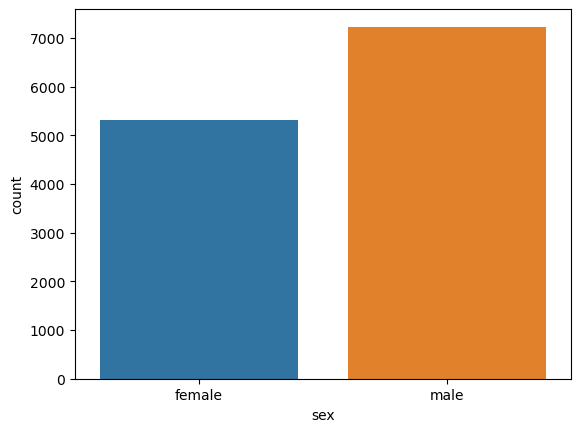

In [20]:
sns.countplot(data=train, x='sex')
plt.show()

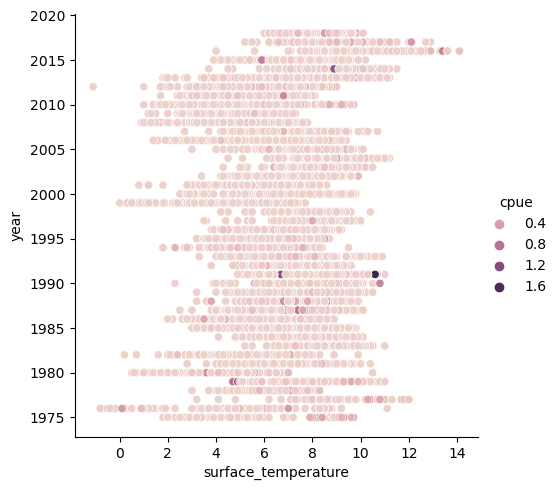

In [21]:
sns.relplot(data=train, x="surface_temperature", y="year", hue="cpue")
plt.show()

In [22]:
train.head()

latitude  longitude       year     sex  bottom_depth  \
4224  58.32467 -165.89359 1987-01-01  female            42   
1303  57.66500 -163.99000 1980-01-01    male            49   
9406  56.65711 -171.35161 1999-01-01    male           117   
6165  58.28592 -173.55558 1991-01-01  female           117   
1646  56.83500 -169.87384 1981-01-01    male            73   

      surface_temperature  bottom_temperature  haul   cpue  
4224                  4.1                 3.4    76     77  
1303                  3.3                 1.3    29  21400  
9406                  6.6                 2.7   149   3413  
6165                 10.0                 2.5   173  84660  
1646                  6.9                 5.8   133   3281

In [23]:
train_year = train.groupby(train.year).mean()
train_year

latitude   longitude  bottom_depth  surface_temperature  \
year                                                                   
1975-01-01  56.595067 -166.733333     89.312000             6.453600   
1976-01-01  56.947408 -167.551111     91.637037             4.668148   
1977-01-01  57.025951 -168.024285     89.914286             9.051429   
1978-01-01  57.819431 -169.514656     93.593607             6.463014   
1979-01-01  58.432300 -170.333800     84.693617             8.142128   
1980-01-01  58.338187 -170.048128     88.706122             4.757143   
1981-01-01  58.358618 -170.320885     90.093750             6.946528   
1982-01-01  58.328756 -169.954515     86.519403             6.099403   
1983-01-01  58.266351 -169.971988     90.840149             8.884387   
1984-01-01  58.306764 -170.045224     90.137931             7.657053   
1985-01-01  58.489153 -170.635167     88.595668             7.059567   
1986-01-01  58.435077 -170.250682     87.996552             6.147241   
1987-01-01  58.775485 -170.867444     89.956710             7.679221   
1988-01-01  58.716199 -170.840582     87.525836             7.087234   
1989-01-01  58.811527 -171.103881     87.934375             7.629375   
1990-01-01  58.641000 -170.862178     91.888525             7.971148   
1991-01-01  58.575257 -171.169322     94.756849             8.746575   
1992-01-01  58.561404 -171.279224     94.441860             7.561130   
1993-01-01  58.774648 -171.098297     89.095092             7.494479   
1994-01-01  58.717880 -171.067924     90.555102             6.018367   
1995-01-01  58.629695 -171.003356     90.347962             6.504075   
1996-01-01  58.607134 -171.150298     93.883792             7.352599   
1997-01-01  58.245206 -170.231978     92.806667             8.284333   
1998-01-01  58.548071 -170.459189     89.058480             8.131871   
1999-01-01  58.550207 -170.485570     87.169591             4.592105   
2000-01-01  58.645851 -170.576284     86.665574             6.966557   
2001-01-01  58.723133 -170.724395     87.957237             6.163158   
2002-01-01  58.599300 -170.749521     87.075540             7.345324   
2003-01-01  58.694297 -171.078003     91.915385             8.285769   
2004-01-01  58.859656 -171.527257     92.382143             9.358214   
2005-01-01  58.782442 -170.982563     88.114391             7.705535   
2006-01-01  58.668158 -170.761136     88.184564             6.072148   
2007-01-01  58.618275 -171.114908     91.835714             7.388214   
2008-01-01  58.670009 -171.065508     89.651515             4.776970   
2009-01-01  58.649782 -170.913438     88.501458             5.179883   
2010-01-01  58.685761 -171.025850     90.492754             6.286667   
2011-01-01  58.590483 -171.048200     92.349570             5.368481   
2012-01-01  58.639842 -170.946989     89.539589             5.871554   
2013-01-01  58.697782 -171.214509     91.490683             7.059317   
2014-01-01  58.719242 -171.151948     91.264151             8.928616   
2015-01-01  58.806380 -171.241159     90.557692             7.435897   
2016-01-01  58.680942 -171.337657     94.058182            10.398909   
2017-01-01  58.843092 -171.605279     92.464419             9.000375   
2018-01-01  58.860891 -171.250000     88.653571             8.057500   

            bottom_temperature        haul          cpue  
year                                                      
1975-01-01            1.816800   85.752000  80314.592000  
1976-01-01            1.376296  102.355556  40574.525926  
1977-01-01            3.074286   99.457143  92093.857143  
1978-01-01            2.941096   92.246575  30489.219178  
1979-01-01            4.003404  165.787234  58451.982979  
1980-01-01            2.037143  106.077551  37613.869388  
1981-01-01            3.047222  107.465278  24734.569444  
1982-01-01            2.211343  111.256716  25467.528358  
1983-01-01            2.234201  109.011152  22904.535316  
1984-01-01            1.525705  113.692790  15446.2

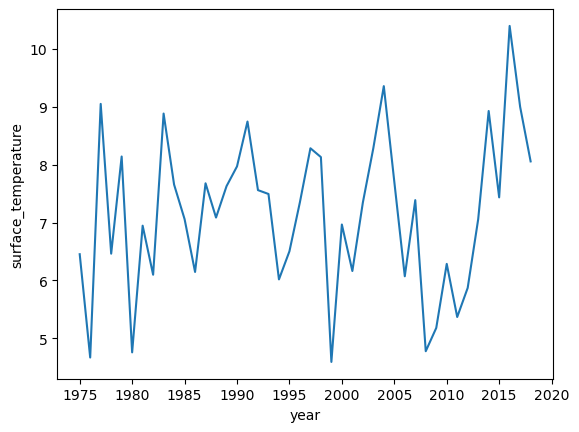

In [24]:

sns.lineplot(data=train_year, x=train_year.index, y="surface_temperature")

plt.show()

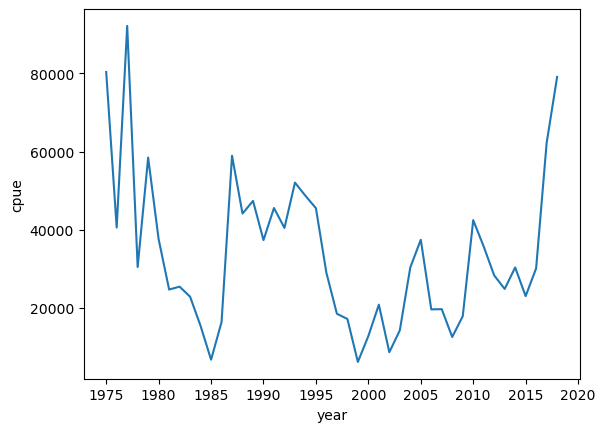

In [25]:
sns.lineplot(data=train_year, x=train_year.index, y="cpue")
plt.show()

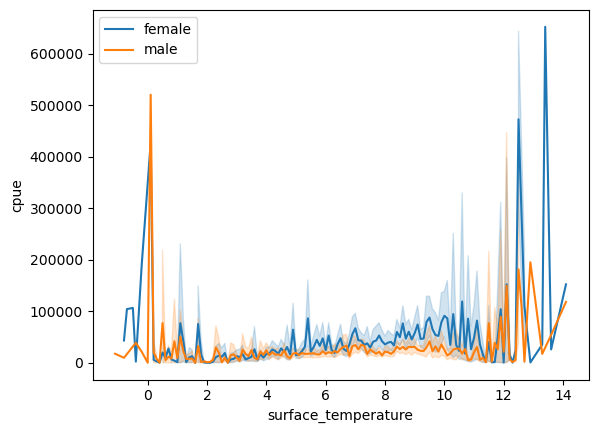

In [26]:
sns.lineplot(data=train[train['sex'] == 'female'], x="surface_temperature", y="cpue", label = 'female')
sns.lineplot(data=train[train['sex'] == 'male'], x="surface_temperature", y="cpue", label = 'male')
plt.legend()
plt.show()

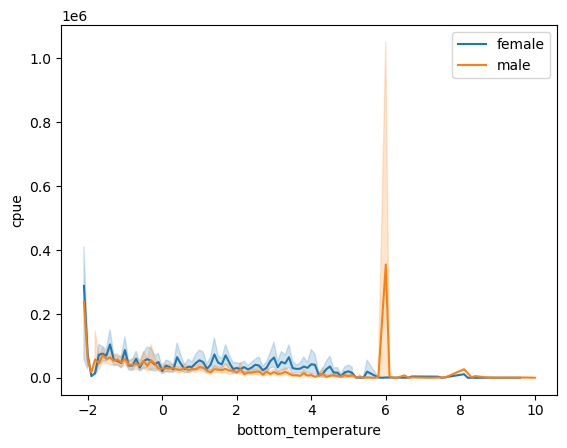

In [27]:
sns.lineplot(data=train[train['sex'] == 'female'], x="bottom_temperature", y="cpue", label = 'female')
sns.lineplot(data=train[train['sex'] == 'male'], x="bottom_temperature", y="cpue", label = 'male')
plt.legend()
plt.show()

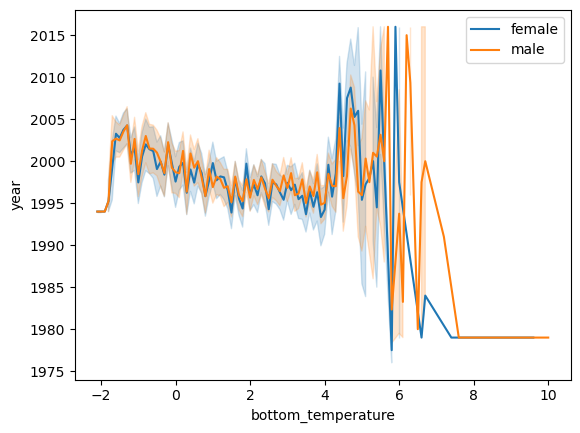

In [28]:
sns.lineplot(data=train[train['sex'] == 'female'], x="bottom_temperature", y="year", label = 'female')
sns.lineplot(data=train[train['sex'] == 'male'], x="bottom_temperature", y="year", label = 'male')
plt.legend()
plt.show()

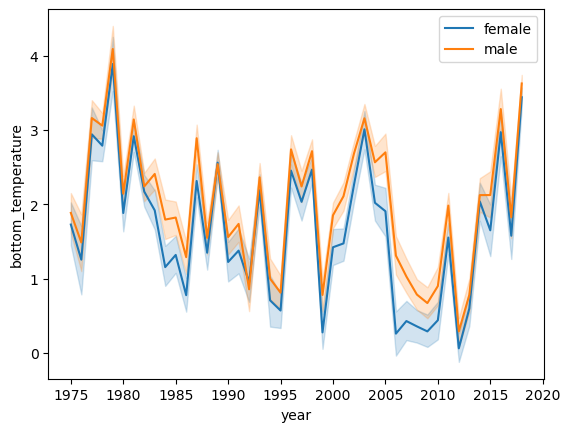

In [29]:
sns.lineplot(data=train[train['sex'] == 'female'], x="year", y="bottom_temperature", label = 'female')
sns.lineplot(data=train[train['sex'] == 'male'], x="year", y="bottom_temperature", label = 'male')
plt.legend()
plt.show()

In [30]:

train_year5 = train_year.resample('5y').mean()
train_year5.head()

latitude   longitude  bottom_depth  surface_temperature  \
year                                                                   
1975-12-31  56.595067 -166.733333     89.312000             6.453600   
1980-12-31  57.712655 -169.094396     89.708934             6.616372   
1985-12-31  58.349928 -170.185556     89.237380             7.329387   
1990-12-31  58.675858 -170.784954     89.060399             7.302844   
1995-12-31  58.651777 -171.123625     91.839373             7.264925   

            bottom_temperature        haul          cpue  
year                                                      
1975-12-31            1.816800   85.752000  80314.592000  
1980-12-31            2.686445  113.184812  51844.690923  
1985-12-31            2.129615  107.912624  19071.173265  
1990-12-31            1.830359  127.258272  40842.546139  
1995-12-31            1.267107  124.897481  46461.892936

<AxesSubplot:xlabel='year', ylabel='cpue'>

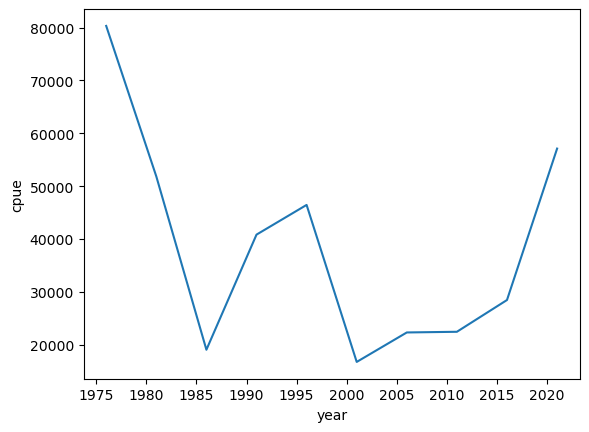

In [31]:
sns.lineplot(data = train_year5, x = 'year', y = 'cpue')

<AxesSubplot:xlabel='year', ylabel='bottom_temperature'>

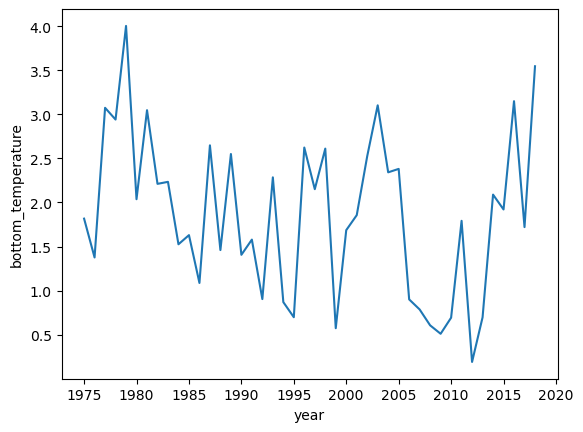

In [32]:
sns.lineplot(data=train_year, x=train_year.index, y="bottom_temperature")

<AxesSubplot:xlabel='year', ylabel='surface_temperature'>

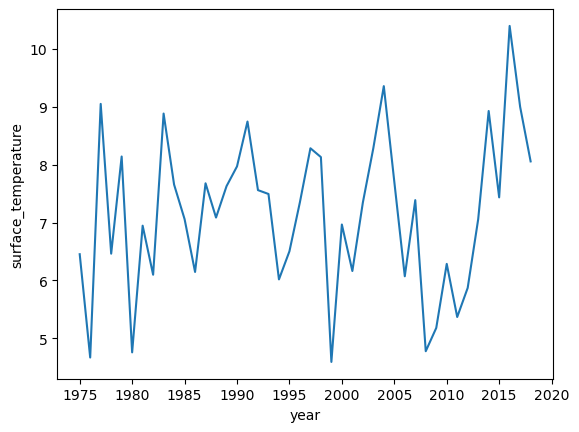

In [33]:
sns.lineplot(data=train_year, x=train_year.index, y="surface_temperature")

<AxesSubplot:xlabel='year'>

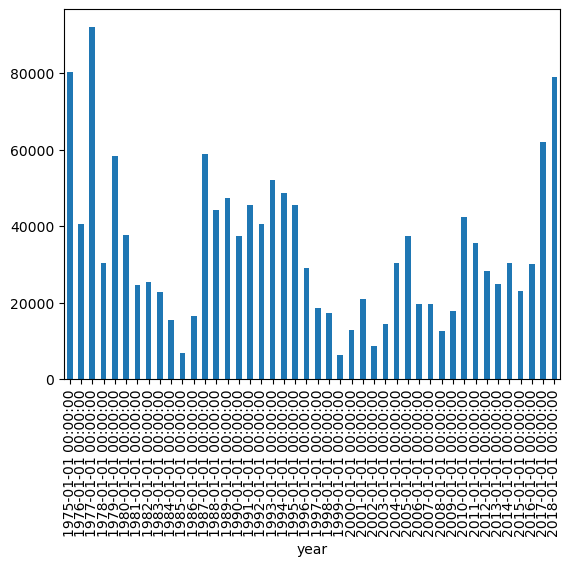

In [34]:
train.groupby('year')['cpue'].mean().plot.bar()

In [35]:
x = train[['cpue']]

In [36]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)
kmeans.predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [37]:
x['unscaled_clusters'] = kmeans.predict(x)

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_10067/1230216673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['unscaled_clusters'] = kmeans.predict(x)


In [52]:
x['latitude'] = train['latitude']
x['longitude'] = train['longitude']
x['year'] = train['year']
x.head()

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_10067/384443525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['latitude'] = train['latitude']
/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_10067/384443525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['longitude'] = train['longitude']
/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_10067/384443525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

cpue  unscaled_clusters  latitude  longitude  scaled_clusters  \
4224     77                  0  58.32467 -165.89359                0   
1303  21400                  0  57.66500 -163.99000                2   
9406   3413                  0  56.65711 -171.35161                0   
6165  84660                  0  58.28592 -173.55558                0   
1646   3281                  0  56.83500 -169.87384                0   

           year  
4224 1987-01-01  
1303 1980-01-01  
9406 1999-01-01  
6165 1991-01-01  
1646 1981-01-01

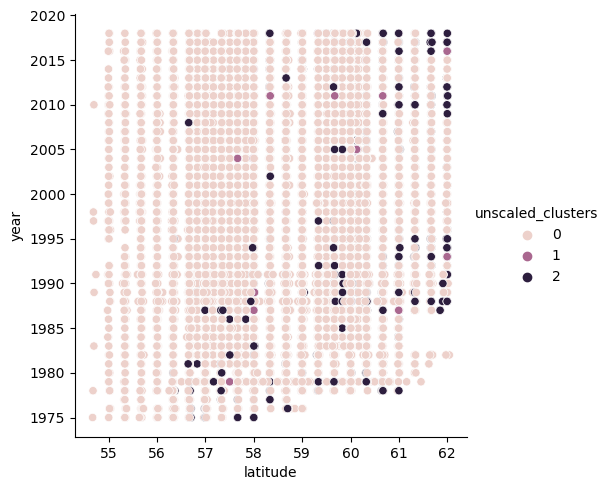

In [55]:
sns.relplot(data = x, x = 'latitude', y = 'year', hue = 'unscaled_clusters')
plt.show()

In [40]:
mm_scaler = MinMaxScaler()

x[['longitude', 'latitude']] = mm_scaler.fit_transform(x[['longitude', 'latitude']])

x.head()

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_10067/1573688560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['longitude', 'latitude']] = mm_scaler.fit_transform(x[['longitude', 'latitude']])


cpue  unscaled_clusters  latitude  longitude
4224     77                  0  0.495810   0.621912
1303  21400                  0  0.406397   0.717931
9406   3413                  0  0.269787   0.346604
6165  84660                  0  0.490558   0.235434
1646   3281                  0  0.293898   0.421145

In [41]:
seed = 99
kmeans_scale = KMeans(n_clusters = 3, random_state = seed)

kmeans_scale.fit(x[['longitude', 'latitude']])

KMeans(n_clusters=3, random_state=99)

In [42]:
x['scaled_clusters'] = kmeans_scale.predict(x[['longitude', 'latitude' ]])

x.head()

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_10067/625481347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['scaled_clusters'] = kmeans_scale.predict(x[['longitude', 'latitude' ]])


cpue  unscaled_clusters  latitude  longitude  scaled_clusters
4224     77                  0  0.495810   0.621912                0
1303  21400                  0  0.406397   0.717931                2
9406   3413                  0  0.269787   0.346604                0
6165  84660                  0  0.490558   0.235434                0
1646   3281                  0  0.293898   0.421145                0

In [43]:
#sns.relplot(data = x, x = 'longitude', y = 'cpue', hue = 'scaled_clusters')
#plt.show()

In [44]:
x[['cpue', 'year']] = train[['cpue', 'year']]

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_10067/2170895030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['cpue', 'year']] = train[['cpue', 'year']]
/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_10067/2170895030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['cpue', 'year']] = train[['cpue', 'year']]


In [45]:
x.head()

cpue  unscaled_clusters  latitude  longitude  scaled_clusters  \
4224     77                  0  0.495810   0.621912                0   
1303  21400                  0  0.406397   0.717931                2   
9406   3413                  0  0.269787   0.346604                0   
6165  84660                  0  0.490558   0.235434                0   
1646   3281                  0  0.293898   0.421145                0   

           year  
4224 1987-01-01  
1303 1980-01-01  
9406 1999-01-01  
6165 1991-01-01  
1646 1981-01-01

In [46]:
x_current = x[x['year'] == '1980-01-01']

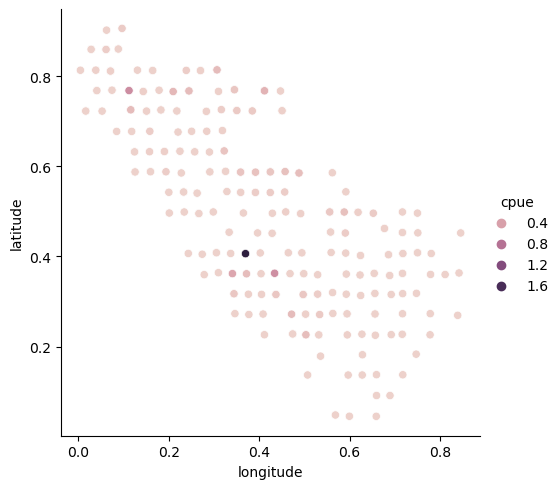

In [47]:
sns.relplot(data = x_current, x = 'longitude', y = 'latitude', 
            hue = 'cpue')
plt.show()

<AxesSubplot:>

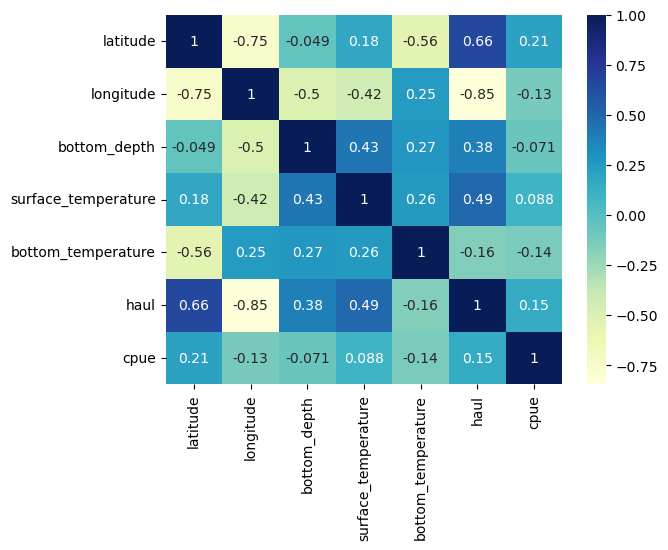

In [48]:
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

In [49]:
stats.spearmanr(train['cpue'], train['surface_temperature'])

SpearmanrResult(correlation=0.0906877885365029, pvalue=2.5119818381322743e-24)

In [50]:
stats.spearmanr(train['cpue'], train['bottom_temperature'])

SpearmanrResult(correlation=-0.38732964457546915, pvalue=0.0)

In [51]:
stats.spearmanr(train['cpue'], train['bottom_depth'])

SpearmanrResult(correlation=-0.1003311053815531, pvalue=1.966968227123919e-29)